In [1]:
#Import Libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_csv(r'C:\Users\DELL\OneDrive\Desktop\fdm_miniproject\housing.csv')

In [3]:
#Data Set Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384977 entries, 0 to 384976
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       384977 non-null  int64  
 1   url                      384977 non-null  object 
 2   region                   384977 non-null  object 
 3   region_url               384977 non-null  object 
 4   price                    384977 non-null  int64  
 5   type                     384977 non-null  object 
 6   sqfeet                   384977 non-null  int64  
 7   beds                     384977 non-null  int64  
 8   baths                    384977 non-null  float64
 9   cats_allowed             384977 non-null  int64  
 10  dogs_allowed             384977 non-null  int64  
 11  smoking_allowed          384977 non-null  int64  
 12  wheelchair_access        384977 non-null  int64  
 13  electric_vehicle_charge  384977 non-null  int64  
 14  come

In [4]:
#Check Null Values before removing null values in the Data Set(Before Removing Null Values)
df.isnull().sum()

id                              0
url                             0
region                          0
region_url                      0
price                           0
type                            0
sqfeet                          0
beds                            0
baths                           0
cats_allowed                    0
dogs_allowed                    0
smoking_allowed                 0
wheelchair_access               0
electric_vehicle_charge         0
comes_furnished                 0
laundry_options             79026
parking_options            140687
image_url                       0
description                     2
lat                          1918
long                         1918
state                           0
dtype: int64

In [5]:
#Removing all Null values 
df =df.dropna()

In [6]:
#Check Null Values in the Data Set After Removing Null Values
df.isnull().sum()

id                         0
url                        0
region                     0
region_url                 0
price                      0
type                       0
sqfeet                     0
beds                       0
baths                      0
cats_allowed               0
dogs_allowed               0
smoking_allowed            0
wheelchair_access          0
electric_vehicle_charge    0
comes_furnished            0
laundry_options            0
parking_options            0
image_url                  0
description                0
lat                        0
long                       0
state                      0
dtype: int64

In [7]:
#State(CHECK UNIQUE VALUES)
df.state.unique()

array(['ca', 'co', 'ct', 'dc', 'fl', 'de', 'ga', 'hi', 'id', 'il', 'in',
       'ia', 'ks', 'ky', 'la', 'me', 'md', 'ma', 'mi', 'mn', 'ms', 'nc',
       'mo', 'mt', 'ne', 'nv', 'nj', 'nm', 'ny', 'nh', 'oh', 'nd', 'ok',
       'or', 'pa', 'ri', 'sc', 'tn', 'sd', 'tx', 'ut', 'va', 'vt', 'wa',
       'wv', 'wi', 'wy', 'al', 'ak', 'az', 'ar'], dtype=object)

In [8]:
df.parking_options.unique()

array(['carport', 'attached garage', 'off-street parking',
       'detached garage', 'street parking', 'no parking', 'valet parking'],
      dtype=object)

In [9]:
df.laundry_options.unique()

array(['w/d in unit', 'w/d hookups', 'laundry on site',
       'no laundry on site', 'laundry in bldg'], dtype=object)

In [10]:
df.type.unique()

array(['apartment', 'condo', 'house', 'duplex', 'townhouse',
       'manufactured', 'flat', 'loft', 'in-law', 'cottage/cabin', 'land',
       'assisted living'], dtype=object)

In [11]:
df.region.unique()

array(['reno / tahoe', 'sacramento', 'boulder', 'visalia-tulare',
       'santa barbara', 'SF bay area', 'siskiyou county',
       'ventura county', 'san diego', 'san luis obispo', 'santa maria',
       'stockton', 'susanville', 'colorado springs', 'yuba-sutter',
       'denver', 'fort collins / north CO', 'western slope', 'hartford',
       'new haven', 'eastern CT', 'washington, DC', 'pueblo',
       'ft myers / SW florida', 'high rockies', 'jacksonville', 'ocala',
       'daytona beach', 'eastern CO', 'northwest CT', 'lakeland',
       'delaware', 'florida keys', 'north central FL', 'gainesville',
       'heartland florida', 'orlando', 'panama city', 'pensacola',
       'south florida', 'okaloosa / walton', 'space coast', 'tallahassee',
       'sarasota-bradenton', 'tampa bay area', 'atlanta', 'augusta',
       'brunswick', 'athens', 'albany', 'treasure coast', 'st augustine',
       'macon / warner robins', 'columbus', 'northwest GA',
       'savannah / hinesville', 'hawaii', 'stat

In [12]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
df['state']=le.fit(df['state']).transform(df['state'])
df['parking_options']=le.fit(df['parking_options']).transform(df['parking_options'])
df['laundry_options']=le.fit(df['laundry_options']).transform(df['laundry_options'])
df['type']=le.fit(df['type']).transform(df['type'])

In [13]:
df["pets_allowed"] = df["cats_allowed"] + df["dogs_allowed"]

In [14]:
df.pets_allowed[df.pets_allowed == 2] = 1

C:\Users\DELL\AppData\Local\Temp\ipykernel_15200\1713055787.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.pets_allowed[df.pets_allowed == 2] = 1


In [15]:
df.pets_allowed.unique()

array([1, 0], dtype=int64)

In [16]:
df = df.drop(columns =["region_url","region","url","lat","long","description","image_url","id","cats_allowed","dogs_allowed"])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 235969 entries, 0 to 384976
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   price                    235969 non-null  int64  
 1   type                     235969 non-null  int32  
 2   sqfeet                   235969 non-null  int64  
 3   beds                     235969 non-null  int64  
 4   baths                    235969 non-null  float64
 5   smoking_allowed          235969 non-null  int64  
 6   wheelchair_access        235969 non-null  int64  
 7   electric_vehicle_charge  235969 non-null  int64  
 8   comes_furnished          235969 non-null  int64  
 9   laundry_options          235969 non-null  int32  
 10  parking_options          235969 non-null  int32  
 11  state                    235969 non-null  int32  
 12  pets_allowed             235969 non-null  int64  
dtypes: float64(1), int32(4), int64(8)
memory usage: 21.6 MB


In [18]:
df.baths.unique()

array([ 2. ,  1. ,  3. ,  1.5,  2.5,  3.5,  0. ,  4.5,  5. ,  4. ,  6. ,
        5.5,  7. ,  6.5, 35. , 75. ,  7.5,  8. ])

In [19]:
df["baths"] = df["baths"].astype(int)

<Axes: xlabel='state'>

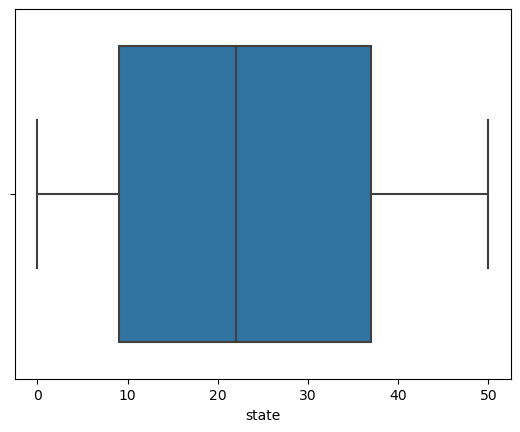

In [20]:
sns.boxplot(x=df['state'])

In [21]:
index_names = df[ (df['state'] >= 38) | (df['state'] <= 9)].index

df.drop(index_names, inplace = True)

In [22]:
df.state.unique()

array([10, 11, 13, 14, 15, 12, 16, 17, 18, 21, 20, 19, 22, 23, 25, 27, 24,
       26, 29, 33, 31, 32, 34, 30, 35, 28, 36, 37])

In [23]:
beds = df[ (df['beds'] > 8 )].index
df.drop(beds, inplace = True)

In [24]:
df.drop(df.index[df['baths'] == 0.0], inplace = True)

df.drop(df.index[df['beds'] == 0], inplace = True)

# using np.ceil to round to
df['baths'] = df['baths'].apply(np.ceil)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111851 entries, 49685 to 249243
Data columns (total 13 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   price                    111851 non-null  int64  
 1   type                     111851 non-null  int32  
 2   sqfeet                   111851 non-null  int64  
 3   beds                     111851 non-null  int64  
 4   baths                    111851 non-null  float64
 5   smoking_allowed          111851 non-null  int64  
 6   wheelchair_access        111851 non-null  int64  
 7   electric_vehicle_charge  111851 non-null  int64  
 8   comes_furnished          111851 non-null  int64  
 9   laundry_options          111851 non-null  int32  
 10  parking_options          111851 non-null  int32  
 11  state                    111851 non-null  int32  
 12  pets_allowed             111851 non-null  int64  
dtypes: float64(1), int32(4), int64(8)
memory usage: 10.2 MB

In [26]:
df.to_csv('Preprocessed_dataset.csv',index=False) 